# First part a and c together, followed by part b and c together

# Part a

In [24]:
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.io import loadmat

In [25]:
m = loadmat("cancer-data.mat")
print(m.keys())

x_train = m['cancerInput_train']
y_train = m['cancerTarget_train'].ravel() # ravel creates a 1D array from the initial column vector y

x_test = m['cancerInput_test']
y_test = m['cancerTarget_test'].ravel()

dict_keys(['cancerInput_test', '__header__', 'cancerTarget_train', '__globals__', 'cancerInput_train', 'cancerTarget_test', '__version__'])


In [26]:
C_list=[0.01, 0.1, 0.5, 1, 5, 10, 50]

In [27]:
def func(kernel, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    test_error=[]
    train_error=[]
    for C in C_list:

        clf = svm.SVC(gamma=0.001, C=C, kernel=kernel, degree=2)
        clf.fit(x_train, y_train)
        test_error.append(100 * (1 - clf.score(x_test, y_test)))
        train_error.append(100 * (1 - clf.score(x_train, y_train)))
    return test_error, train_error

In [28]:
test_error, train_error = func(kernel="linear", x_train=x_train, y_train=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("SVC with Linear Kernel")
plt.legend()
plt.show()

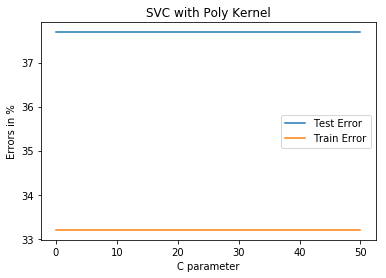

In [29]:
test_error, train_error = func(kernel="poly", x_train=x_train, y_train=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("SVC with Poly Kernel")
plt.legend()
plt.show()

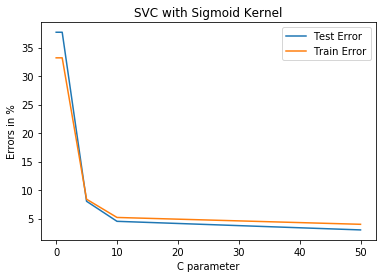

In [30]:
test_error, train_error = func(kernel="sigmoid", x_train=x_train, y_train=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("SVC with Sigmoid Kernel")
plt.legend()
plt.show()

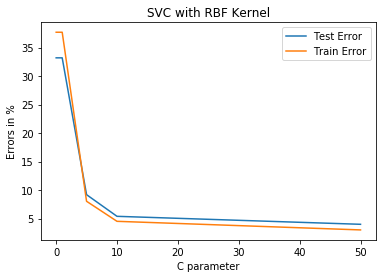

In [31]:
test_error, train_error = func(kernel="rbf", x_train=x_test, y_train=y_test, x_test=x_train, y_test=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("SVC with RBF Kernel")
plt.legend()
plt.show()

# Swap train-test data sets (part c in relation to a)

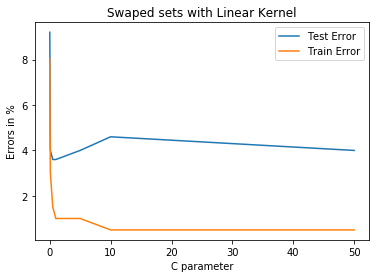

In [32]:
test_error, train_error = func(kernel="linear", x_train=x_test, y_train=y_test, x_test=x_train, y_test=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("Swaped sets with Linear Kernel")
plt.legend()
plt.show()

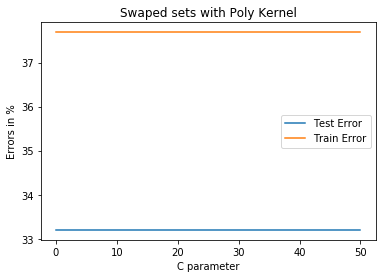

In [33]:
test_error, train_error = func(kernel="poly", x_train=x_test, y_train=y_test, x_test=x_train, y_test=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("Swaped sets with Poly Kernel")
plt.legend()
plt.show()

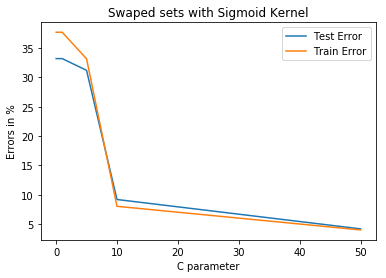

In [34]:
test_error, train_error = func(kernel="sigmoid", x_train=x_test, y_train=y_test, x_test=x_train, y_test=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("Swaped sets with Sigmoid Kernel")
plt.legend()
plt.show()

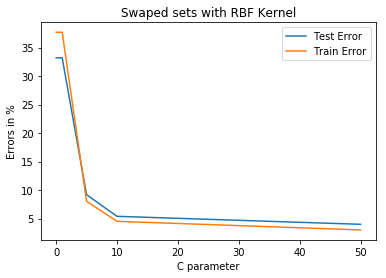

In [35]:
test_error, train_error = func(kernel="rbf", x_train=x_test, y_train=y_test, x_test=x_train, y_test=y_train)

plt.plot(C_list, test_error, label="Test Error")
plt.plot(C_list, train_error, label="Train Error")
plt.ylabel("Errors in %")
plt.xlabel("C parameter")
plt.title("Swaped sets with RBF Kernel")
plt.legend()
plt.show()

# Part b

In [36]:
import numpy as np
from sklearn import svm
from scipy.io import loadmat
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [38]:
param_dist = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1), 'kernel': ['rbf', "poly"], 'degree': [1,2,3], 'class_weight':['balanced', None]}

clf = svm.SVC()
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.960 (std: 0.015)
Parameters: {'C': 224.95077660970847, 'kernel': 'poly', 'degree': 1, 'class_weight': None, 'gamma': 0.024881636279336771}

Model with rank: 1
Mean validation score: 0.960 (std: 0.015)
Parameters: {'C': 29.30056414192974, 'kernel': 'rbf', 'degree': 2, 'class_weight': 'balanced', 'gamma': 0.013722400191678219}

Model with rank: 1
Mean validation score: 0.960 (std: 0.019)
Parameters: {'C': 17.632840033716157, 'kernel': 'rbf', 'degree': 3, 'class_weight': 'balanced', 'gamma': 0.26741307957964838}

Model with rank: 1
Mean validation score: 0.960 (std: 0.015)
Parameters: {'C': 121.36058436922474, 'kernel': 'rbf', 'degree': 3, 'class_weight': 'balanced', 'gamma': 0.07146691146373528}



# Swap train-test data sets (part c in relation to b)

In [39]:
random_search.fit(x_test, y_test)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.990 (std: 0.007)
Parameters: {'C': 146.98603681880596, 'kernel': 'poly', 'degree': 3, 'class_weight': 'balanced', 'gamma': 0.14079228585790252}

Model with rank: 2
Mean validation score: 0.985 (std: 0.012)
Parameters: {'C': 12.368909010483945, 'kernel': 'rbf', 'degree': 1, 'class_weight': 'balanced', 'gamma': 0.11832929728942188}

Model with rank: 2
Mean validation score: 0.985 (std: 0.000)
Parameters: {'C': 27.335213997440132, 'kernel': 'rbf', 'degree': 1, 'class_weight': None, 'gamma': 0.08025518406619625}

Model with rank: 2
Mean validation score: 0.985 (std: 0.000)
Parameters: {'C': 39.606164410194218, 'kernel': 'rbf', 'degree': 3, 'class_weight': None, 'gamma': 0.070189761801391276}

Model with rank: 2
Mean validation score: 0.985 (std: 0.012)
Parameters: {'C': 9.577790824506863, 'kernel': 'rbf', 'degree': 1, 'class_weight': 'balanced', 'gamma': 0.11329152727294525}

Model with rank: 2
Mean validation score: 0.985 (std: 0.012)
Parameters